# Data Analysis

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fitparse import FitFile

## Load Data

### Find Files

In [7]:
path = "path_1"
acc_file = None
gps_file = None
for f in os.listdir(path):
    if f.endswith(".csv"):
        acc_file = f
    if f.endswith(".FIT"):
        gps_file = f

# Acceleration data
acc_data = pd.read_csv(path + "/" + acc_file, sep=";", header=1, names=["time", "ax", "ay", "az", "norm"])

# GPS data
time = []
alt = []
lat = []
long = []
units = {"alt" : "", "lat": "", "long": ""}
gps_fit_file = fitfile = FitFile(path + "/" + gps_file)
for record in fitfile.get_messages('record'):
    for record_data in record:
        if record_data.name == "timestamp":
            time.append(record_data.value)
        if record_data.name == "altitude":
            alt.append(record_data.value)
            if units["alt"] == "":
                units["alt"] = record_data.units
        if record_data.name == "position_lat":
            lat.append(record_data.value)
            if units["lat"] == "":
                units["lat"] = record_data.units
        if record_data.name == "position_long":
            long.append(record_data.value)
            if units["long"] == "":
                units["long"] = record_data.units
gps_data = pd.DataFrame(list(zip(time, lat, long, alt)), columns= ["time", "alt", "lat", "long"])


collect data = OK


## Acceleration Data

In [5]:
acc_data

,time,ax,ay,az,norm
0,11:41:59:3080,"0,0578","0,4279","0,9532","1,046"
1,11:41:59:3110,"0,0640","0,4199","0,9443","1,035"
2,11:41:59:3130,"0,0734","0,4136","0,9332","1,023"
3,11:41:59:3150,"0,0761","0,4122","0,9277","1,017"
4,11:41:59:3180,"0,0715","0,4173","0,9261","1,018"
...,...,...,...,...,...
29800,12:14:18:5010,"0,0176","0,5329","0,8640","1,017"
29801,12:14:18:5100,"0,0177","0,5344","0,8529","1,008"
29802,12:14:18:5140,"0,0177","0,5307","0,8460","1,000"
29803,12:14:18:5170,"0,0195","0,5317","0,8454","1,000"


In [6]:
acc_data.describe()

,time,ax,ay,az,norm
count,29805,29805,29805,29805,29805
unique,29805,5109,5021,4865,830
top,11:41:59:3080,"0,0433","0,0903","1,0095","1,018"
freq,1,34,36,44,291


In [12]:
# acc_data.hist(column="ax")

In [9]:
acc_data.isna().sum()

time    0
ax      0
ay      0
az      0
norm    0
dtype: int64

Text(0.5, 1.0, 'Acceleration Z')

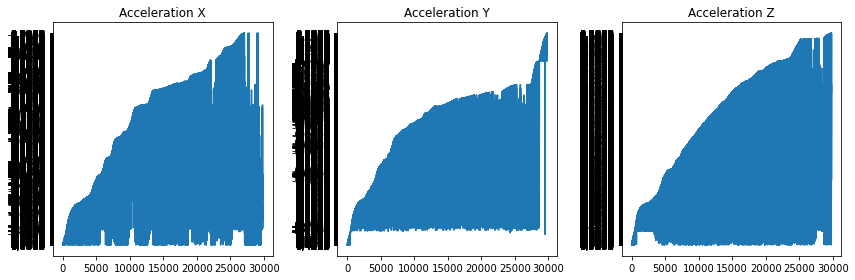

In [10]:
nb_measure = acc_data.shape[0]

fig, axs = plt.subplots(1,3)
fig.set_tight_layout(True)
fig.set_size_inches(12, 4)
axs[0].plot(range(nb_measure), acc_data["ax"])
axs[0].set_title("Acceleration X")
axs[1].plot(range(nb_measure), acc_data["ay"])
axs[1].set_title("Acceleration Y")
axs[2].plot(range(nb_measure), acc_data["az"])
axs[2].set_title("Acceleration Z")

## GPS Data

In [8]:
gps_data

,time,alt,lat,long
0,2023-02-28 10:42:06,577356964,88377545,268.6
1,2023-02-28 10:42:34,577357486,88377420,268.6
2,2023-02-28 10:42:35,577357763,88377537,268.6
3,2023-02-28 10:42:37,577358129,88377887,268.6
4,2023-02-28 10:42:39,577358339,88378530,268.6
...,...,...,...,...
1472,2023-02-28 11:13:35,579484766,92300223,149.0
1473,2023-02-28 11:13:42,579486097,92298746,148.0
1474,2023-02-28 11:13:45,579486428,92298822,148.0
1475,2023-02-28 11:13:55,579486542,92298621,148.0


In [9]:
gps_data.describe()

,alt,lat,long
count,1.477000e+03,1.477000e+03,1477.000000
mean,5.783931e+08,9.038763e+07,183.435206
std,7.228750e+05,1.246278e+06,28.159797
min,5.772696e+08,8.837742e+07,148.000000
25%,5.776565e+08,8.929622e+07,162.200000
50%,5.786026e+08,9.022086e+07,177.200000
75%,5.789447e+08,9.157494e+07,192.400000
max,5.794865e+08,9.232943e+07,268.600000


In [10]:
gps_data.isna().sum()

time    0
alt     0
lat     0
long    0
dtype: int64